**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/stochastic-gradient-descent).**

---


# Introduction #

* You will use your new knowledge to train a model with SGD.
* Begin by running the code cell below to set up code checking and the filepaths for the dataset.

In [1]:
# Setup plotting
import matplotlib.pyplot as plt
from learntools.deep_learning_intro.dltools import animate_sgd
plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex3 import *

# Preparation

In [2]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [3]:
# Import data
fuel = pd.read_csv('../input/dl-course-data/fuel.csv')
X = fuel.copy()

# Remove target
y = X.pop('FE')

# Preprocess data
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)
X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

# Display input shape
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [4]:
# Uncomment next line to see original data
fuel.head()
# Uncomment next line to see processed features
# pd.DataFrame(X[:10,:]).head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


# Build Model

In [5]:
# Import packages
from tensorflow import keras
from tensorflow.keras import layers

# Define model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

# Define the loss and optimizer
model.compile(
    optimizer='sgd',
    loss='mae'
)

2022-04-05 07:49:38.720502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 07:49:38.799716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 07:49:38.800473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 07:49:38.802206: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
# Train model
history = model.fit(
    X,y,
    batch_size=128,
    epochs=200
)

2022-04-05 07:49:41.011682: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
9/9 [==============================] - 1s 3ms/step - loss: 3.1306
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 2.6110
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 1.7989
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8445
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4137
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3059
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2538
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2244
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1986
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1820
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1689
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1542
Epoch 13/200
9/9 [==============================] - 0s 2ms/st

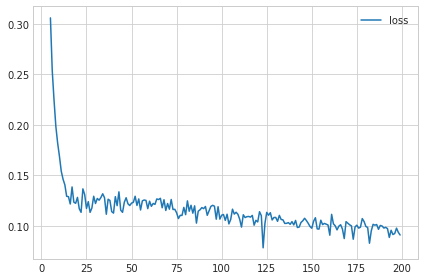

In [7]:
# Import packages
import pandas as pd

# Analyze loss curves and evaluate training
history_df = pd.DataFrame(history.history)

# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In [8]:
# Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.05
batch_size = 128
num_examples = 256

# Display sgd process
animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small sample of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-deep-learning/discussion) to chat with other learners.*